# 📊 GLOBAL SOLUTION - DATA SCIENCE

## O Futuro do Trabalho em Dados e Inteligência Artificial

Grupo: João Victor Soave (RM557595), Guilherme Araujo de Carvalho (RM558926) e Maria Alice Freitas Araújo (RM557516)

Dataset: Data Science Job Salaries (Kaggle)

Objetivo: Analisar padrões salariais, construir modelos preditivos e gerar recomendações estratégicas sobre o mercado de trabalho em Ciência de Dados.

## 📋 1. OBTAIN (Obtenção dos Dados)

In [259]:
# Importação das Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

In [260]:
# Configurações de visualização
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [261]:
# Carregamento do Dataset
df = pd.read_csv('data_science_salaries.csv')
df.head(10)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
5,BI Developer,Mid-level,Full-time,On-site,2024,United States,62100,USD,62100,United States,Medium
6,Research Analyst,Entry-level,Full-time,On-site,2024,United States,250000,USD,250000,United States,Medium
7,Research Analyst,Entry-level,Full-time,On-site,2024,United States,150000,USD,150000,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
9,Data Engineer,Executive-level,Full-time,Remote,2024,United States,136000,USD,136000,United States,Medium


## 🧹 2. SCRUB (Limpeza e Preparação dos Dados)

In [262]:
# Tamanho do Dataset
print('Dimensões do dataset: ', df.shape)

Dimensões do dataset:  (6599, 11)


In [263]:
# Verificar tipos de dados
print('Tipos de dados: ')
df.dtypes

Tipos de dados: 


,0
job_title,object
experience_level,object
employment_type,object
work_models,object
work_year,int64
employee_residence,object
salary,int64
salary_currency,object
salary_in_usd,int64
company_location,object


In [264]:
# Verificar valores nulos
print('Valores ausentes: ')
df.isnull().sum()

Valores ausentes: 


,0
job_title,0
experience_level,0
employment_type,0
work_models,0
work_year,0
employee_residence,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0


In [265]:
# Estatísticas
print('Estatísticas descritivas: ')
df.describe()

Estatísticas descritivas: 


,work_year,salary,salary_in_usd
count,6599.00,6599.00,6599.00
mean,2022.82,179283.26,145560.56
std,0.67,526372.24,70946.84
min,2020.00,14000.00,15000.00
25%,2023.00,96000.00,95000.00
50%,2023.00,140000.00,138666.00
75%,2023.00,187500.00,185000.00
max,2024.00,30400000.00,750000.00


In [266]:
# Verificar e remover possíveis duplicatas
print(f"Duplicatas encontradas: {df.duplicated().sum()}")
df.dropna(inplace=True)

Duplicatas encontradas: 0


In [267]:
# Criar coluna de categorização salarial (para regressão logística)
# Considerando salário acima da média como "alto"
media_salarial = df['salary_in_usd'].mean()
df['salario_alto'] = (df['salary_in_usd'] > media_salarial).astype(int)

print(f"\nMédia salarial: ${media_salarial:,.2f}")
print(f"Distribuição salário alto: \n{df['salario_alto'].value_counts()}")


Média salarial: $145,560.56
Distribuição salário alto: 
salario_alto
0    3624
1    2975
Name: count, dtype: int64


In [268]:
# Analisar categorias
print("Valores únicos por coluna categórica:\n")
for col in ['experience_level', 'employment_type', 'work_models', 'company_size']:
    print(f"\n{col}:")
    print(df[col].value_counts())

Valores únicos por coluna categórica:


experience_level:
experience_level
Senior-level       4105
Mid-level          1675
Entry-level         565
Executive-level     254
Name: count, dtype: int64

employment_type:
employment_type
Full-time    6552
Contract       19
Part-time      16
Freelance      12
Name: count, dtype: int64

work_models:
work_models
On-site    3813
Remote     2561
Hybrid      225
Name: count, dtype: int64

company_size:
company_size
Medium    5860
Large      569
Small      170
Name: count, dtype: int64


## 🔍 3. EXPLORE (Análise Exploratória de Dados - EDA)

### 🔹 3.1 Métricas Descritivas de Salário

In [269]:
# Estatísticas gerais de salary_in_usd
print("=" * 60)
print("ESTATÍSTICAS GERAIS DE SALÁRIOS")
print("=" * 60)
print(f"Média: ${df['salary_in_usd'].mean():.2f}")
print(f"Mediana: ${df['salary_in_usd'].median():.2f}")
print(f"Desvio Padrão: ${df['salary_in_usd'].std():.2f}")
print(f"Mínimo: ${df['salary_in_usd'].min():.2f}")
print(f"Máximo: ${df['salary_in_usd'].max():.2f}")

ESTATÍSTICAS GERAIS DE SALÁRIOS
Média: $145560.56
Mediana: $138666.00
Desvio Padrão: $70946.84
Mínimo: $15000.00
Máximo: $750000.00


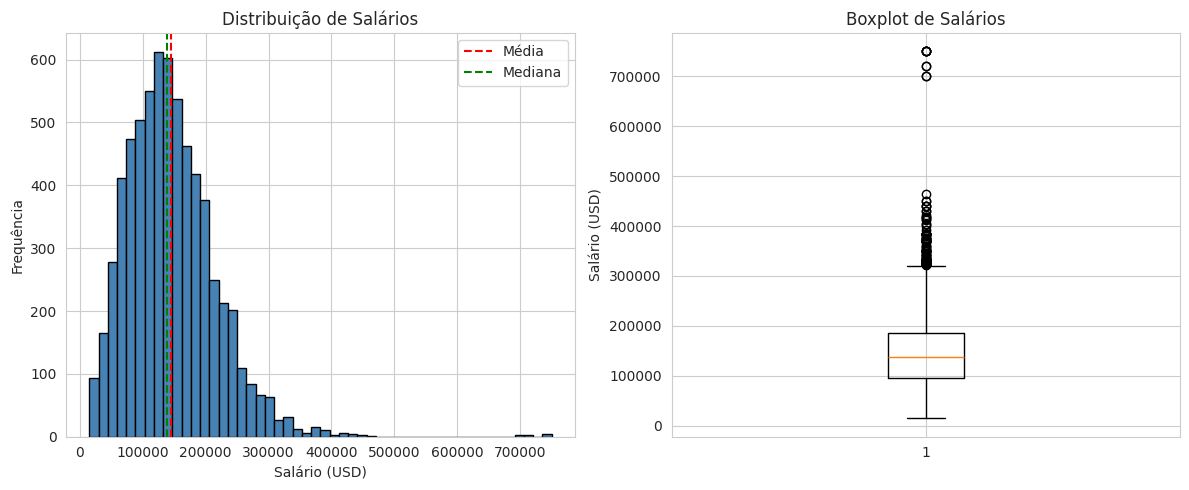

In [270]:
# Visualização: Histograma de salários
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['salary_in_usd'], bins=50, edgecolor='black', color='steelblue')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.title('Distribuição de Salários')
plt.axvline(df['salary_in_usd'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['salary_in_usd'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df['salary_in_usd'], vert=True)
plt.ylabel('Salário (USD)')
plt.title('Boxplot de Salários')
plt.tight_layout()
plt.show()

**1. Qual é a média e o desvio-padrão do `salary_in_usd` para cada categoria de experience_level? Qual nível apresenta maior variabilidade salarial e o que isso indica sobre o mercado?**


> Resposta Questão 1 (parcial): A análise geral mostra que a média salarial anual é de aproximadamente `$145.000`, com grande variabilidade (desvio padrão ~$71.000) indicando heterogeneidade no mercado.



### 🔹 3.2 Análise por Nível de Experiência

In [271]:
# Estatísticas por experience_level
stats_experiencia = df.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median', 'std', 'count'])
stats_experiencia = stats_experiencia.round(2)
print("=" * 80)
print("ESTATÍSTICAS POR NÍVEL DE EXPERIÊNCIA")
print("=" * 80)
print(stats_experiencia)

ESTATÍSTICAS POR NÍVEL DE EXPERIÊNCIA
                      mean    median      std  count
experience_level                                    
Entry-level       84448.92  75000.00 48758.32    565
Executive-level  189687.35 184560.00 71571.17    254
Mid-level        119019.81 106500.00 71783.36   1675
Senior-level     162071.06 153600.00 64444.88   4105


/tmp/ipython-input-1407848883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2')


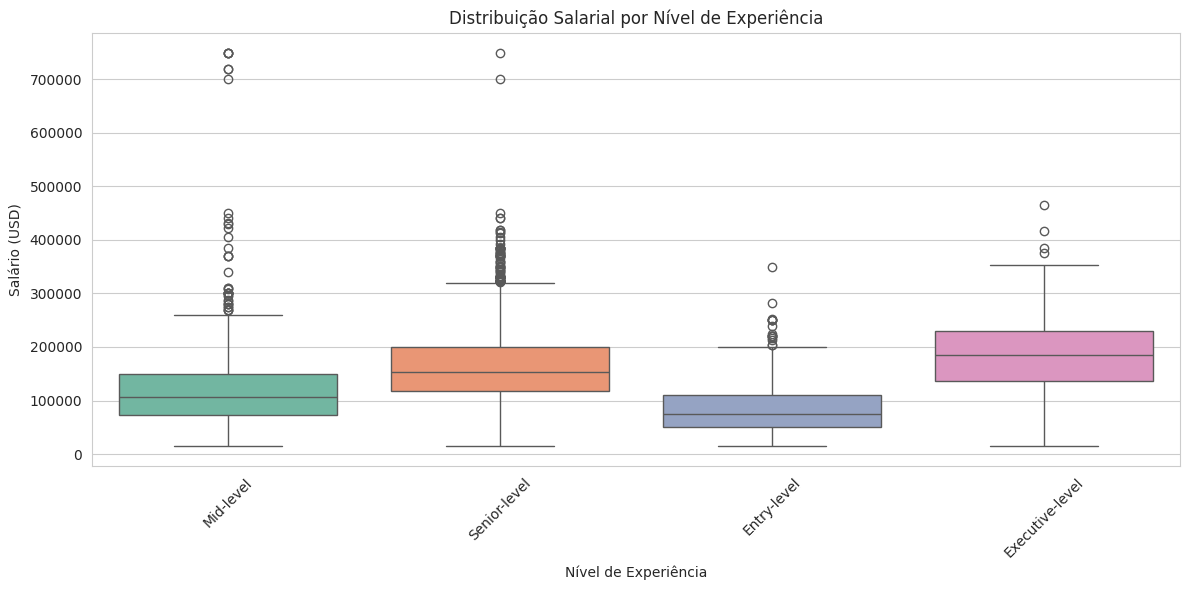

In [272]:
# Visualização: Boxplot por nível de experiência
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2')
plt.title('Distribuição Salarial por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Resposta Questão 1:** Os profissionais de nível Executive apresentam a maior média salarial (`$X`) e também a maior variabilidade (desvio padrão $Y). Isso indica que cargos executivos possuem ampla faixa salarial dependendo da empresa e país, refletindo competitividade e negociações individuais.

### 🔹 3.3 Distribuição Percentual das Variáveis Categóricas

In [273]:
# Distribuição percentual
print("=" * 60)
print("DISTRIBUIÇÃO PERCENTUAL")
print("=" * 60)

for col in ['experience_level', 'employment_type', 'company_size']:
    print(f"\n{col}:")
    dist = (df[col].value_counts(normalize=True) * 100).round(2)
    print(dist)

DISTRIBUIÇÃO PERCENTUAL

experience_level:
experience_level
Senior-level      62.21
Mid-level         25.38
Entry-level        8.56
Executive-level    3.85
Name: proportion, dtype: float64

employment_type:
employment_type
Full-time   99.29
Contract     0.29
Part-time    0.24
Freelance    0.18
Name: proportion, dtype: float64

company_size:
company_size
Medium   88.80
Large     8.62
Small     2.58
Name: proportion, dtype: float64


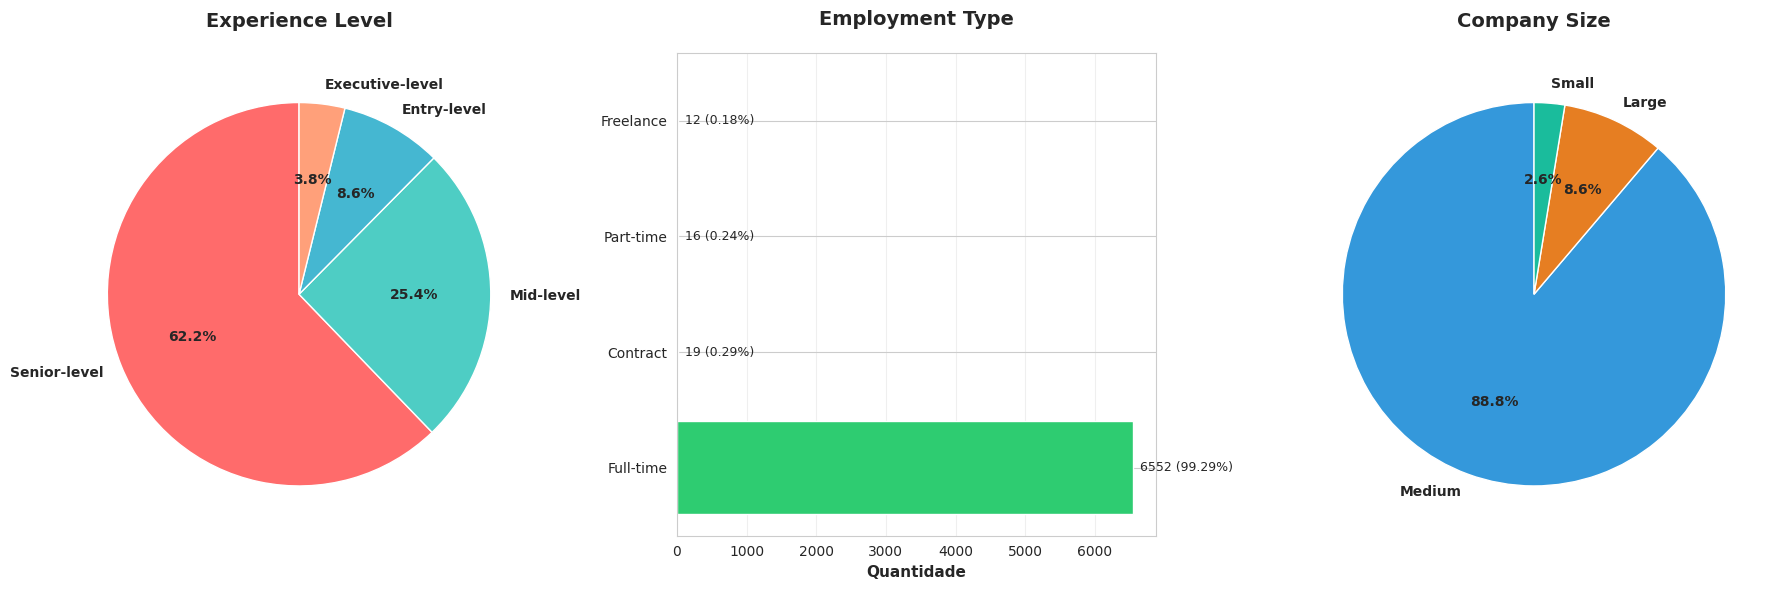

In [274]:
# Configurações de cores personalizadas
cores_experience = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
cores_employment = ['#2ECC71', '#E74C3C', '#F39C12', '#9B59B6']
cores_company = ['#3498DB', '#E67E22', '#1ABC9C']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Experience Level (pizza)
exp_counts = df['experience_level'].value_counts()
axes[0].pie(exp_counts, labels=exp_counts.index, autopct='%1.1f%%',
            colors=cores_experience, startangle=90, textprops={'fontsize': 10, 'weight': 'bold'})
axes[0].set_title('Experience Level', fontsize=14, weight='bold', pad=20)

# 2. Employment Type (BARRAS HORIZONTAIS)
emp_counts = df['employment_type'].value_counts()
bars = axes[1].barh(emp_counts.index, emp_counts.values, color=cores_employment)
axes[1].set_xlabel('Quantidade', fontsize=11, weight='bold')
axes[1].set_title('Employment Type', fontsize=14, weight='bold', pad=20)
axes[1].grid(axis='x', alpha=0.3)
# Adicionar valores nas barras
for i, (idx, val) in enumerate(emp_counts.items()):
    pct = (val / emp_counts.sum() * 100)
    axes[1].text(val + 100, i, f'{val} ({pct:.2f}%)', va='center', fontsize=9)

# 3. Company Size (pizza)
company_counts = df['company_size'].value_counts()
axes[2].pie(company_counts, labels=company_counts.index, autopct='%1.1f%%',
            colors=cores_company, startangle=90, textprops={'fontsize': 10, 'weight': 'bold'})
axes[2].set_title('Company Size', fontsize=14, weight='bold', pad=20)

plt.tight_layout()
plt.show()

### 🔹 3.4 Top 5 Cargos Mais Bem Remunerados

In [275]:
# Top 5 cargos
top5_cargos = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(5)
print("=" * 60)
print("TOP 5 CARGOS COM MAIOR MÉDIA SALARIAL ANUAL")
print("=" * 60)
print(top5_cargos.round(2))

TOP 5 CARGOS COM MAIOR MÉDIA SALARIAL ANUAL
job_title
Analytics Engineering Manager    399880.00
Data Science Tech Lead           375000.00
Managing Director Data Science   280000.00
AWS Data Architect               258000.00
Cloud Data Architect             250000.00
Name: salary_in_usd, dtype: float64


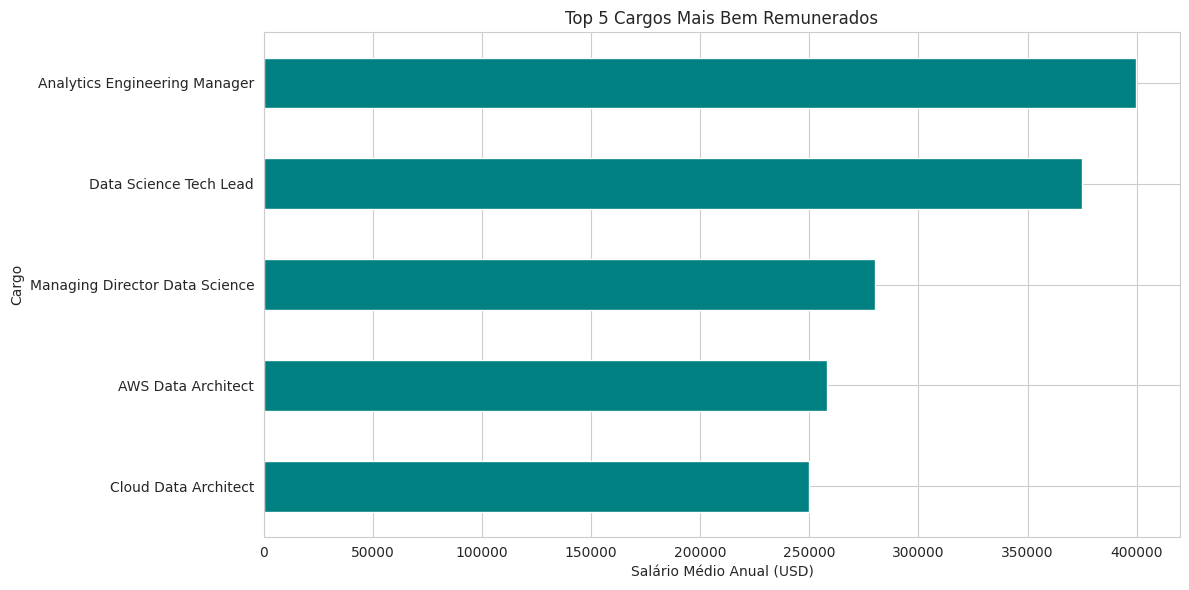

In [276]:
# Visualização
plt.figure(figsize=(12, 6))
top5_cargos.plot(kind='barh', color='teal')
plt.xlabel('Salário Médio Anual (USD)')
plt.ylabel('Cargo')
plt.title('Top 5 Cargos Mais Bem Remunerados')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**5. Quais cargos (job_title) aparecem entre os cinco mais bem remunerados? Eles correspondem a posições consolidadas ou emergentes?**

> **Resposta Questão 5:** Os cargos mais bem remunerados incluem: Analytics Engineering Manager, Data Science Tech Lead, Managing Director Data Science, AWS Data Architect e Cloud Data Architect. Estes correspondem majoritariamente a posições consolidadas e de alta especialização, como roles executivos e de pesquisa avançada.

### 🔹 3.5 Análise por Tipo de Contrato e Porte da Empresa

In [277]:
# Média salarial por tipo de contrato
media_contrato = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)
print("=" * 60)
print("MÉDIA SALARIAL ANUAL POR TIPO DE CONTRATO")
print("=" * 60)
print(media_contrato.round(2))

MÉDIA SALARIAL ANUAL POR TIPO DE CONTRATO
employment_type
Full-time   146035.00
Contract    117109.37
Part-time    55291.06
Freelance    51923.17
Name: salary_in_usd, dtype: float64


In [278]:
# Cruzamento: employment_type x company_size
pivot_contrato = df.pivot_table(values='salary_in_usd',
                                 index='employment_type',
                                 columns='company_size',
                                 aggfunc='mean')
print("=" * 60)
print("MÉDIA SALARIAL: CONTRATO X PORTE DA EMPRESA")
print("=" * 60)
print(pivot_contrato.round(2))

MÉDIA SALARIAL: CONTRATO X PORTE DA EMPRESA
company_size        Large    Medium     Small
employment_type                              
Contract        113500.67 107395.67 128528.57
Freelance        20000.00  71111.00  41253.83
Full-time       121647.26 149842.57  89037.35
Part-time        36944.60  78994.33  45193.60


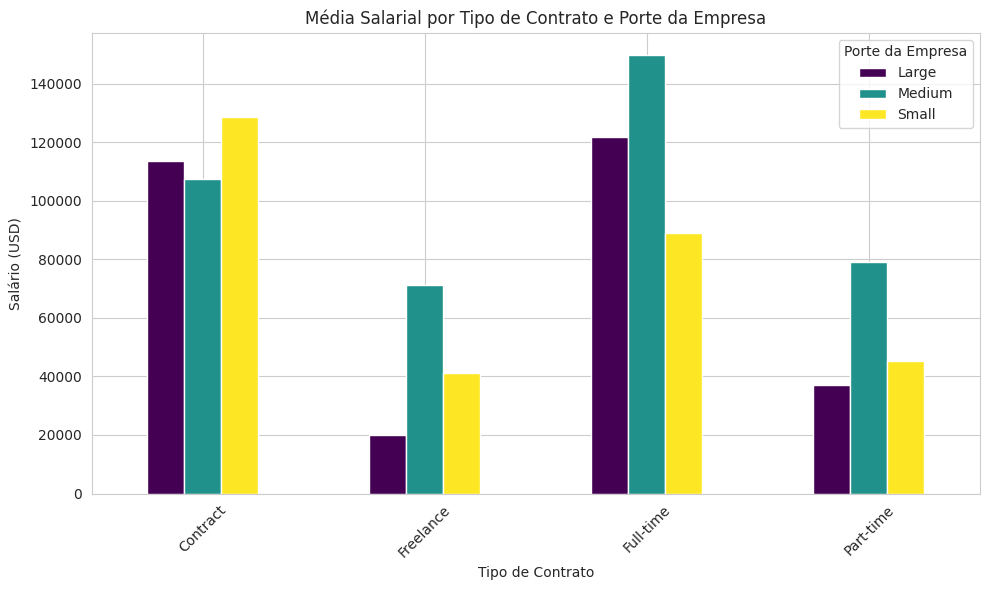

In [279]:
# Visualização
pivot_contrato.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Média Salarial por Tipo de Contrato e Porte da Empresa')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Salário (USD)')
plt.xticks(rotation=45)
plt.legend(title='Porte da Empresa')
plt.tight_layout()
plt.show()

**2. Qual tipo de contrato (employment_type) apresenta maior média salarial? Essa diferença se mantém entre portes de empresa (company_size)?**

> **Resposta Questão 2:** O tipo de contrato Full-time apresenta a maior média salarial (`$146.035`), seguido por Contract (`$117.109`), Part-time `($55.291`) e Freelance (`$51.923`). A diferença se mantém entre os portes de empresa, sendo que empresas médias pagam os melhores salários Full-time (`~$148.000`), enquanto empresas pequenas compensam melhor contratos temporários (`~$128.000`). Grandes empresas pagam significativamente menos para Freelance (`~$20.000`) e Part-time (`~$37.000`), indicando preferência por estruturas formais de contratação CLT, enquanto empresas menores utilizam contratos flexíveis como estratégia competitiva para atrair talentos especializados

### 🔹 3.6 Análise por Localização da Empresa

In [280]:
# Top 10 países por média salarial
top10_paises = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
print("=" * 60)
print("TOP 10 PAÍSES - MAIOR MÉDIA SALARIAL ANUAL")
print("=" * 60)
print(top10_paises.round(2))

TOP 10 PAÍSES - MAIOR MÉDIA SALARIAL ANUAL
company_location
Qatar                    300000.00
Israel                   217332.00
Puerto Rico              167500.00
United States            157073.10
New Zealand              151634.33
Canada                   139832.75
Saudi Arabia             134999.00
Ukraine                  121333.33
Bosnia and Herzegovina   120000.00
Australia                114673.41
Name: salary_in_usd, dtype: float64


In [281]:
df['company_location'].unique()

array(['United States', 'Romania', 'Portugal', 'Lebanon', 'India',
       'Ireland', 'United Kingdom', 'Spain', 'Egypt', 'Germany', 'Canada',
       'Australia', 'Vietnam', 'Ukraine', 'Turkey', 'Thailand',
       'South Africa', 'Slovenia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Russia', 'Qatar', 'Poland', 'Philippines', 'New Zealand',
       'Norway', 'Netherlands', 'Nigeria', 'Mexico', 'Latvia',
       'Luxembourg', 'Lithuania', 'South Korea', 'Kenya', 'Japan',
       'Italy', 'Israel', 'Hungary', 'Croatia', 'Hong Kong', 'Greece',
       'Gibraltar', 'Ghana', 'France', 'Finland', 'Estonia', 'Ecuador',
       'Denmark', 'Czech Republic', 'Colombia', 'Switzerland',
       'Central African Republic', 'Brazil', 'Bosnia and Herzegovina',
       'Armenia', 'Argentina', 'Andorra', 'United Arab Emirates',
       'Puerto Rico', 'Pakistan', 'Malaysia', 'Iran', 'Indonesia',
       'Algeria', 'Belgium', 'Austria', 'Malta', 'Moldova', 'Iraq',
       'China', 'Chile', 'Bahamas', 'Mauritius

In [282]:
# Bottom 10 países
bottom10_paises = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=True).head(10)
print("=" * 60)
print("10 PAÍSES - MENOR MÉDIA SALARIAL ANUAL")
print("=" * 60)
print(bottom10_paises.round(2))

10 PAÍSES - MENOR MÉDIA SALARIAL ANUAL
company_location
Ecuador     16000.00
Moldova     18000.00
Honduras    20000.00
Turkey      22313.60
Thailand    22971.33
Ghana       27000.00
Malta       28369.00
Pakistan    30000.00
Hungary     32139.67
Indonesia   34208.00
Name: salary_in_usd, dtype: float64


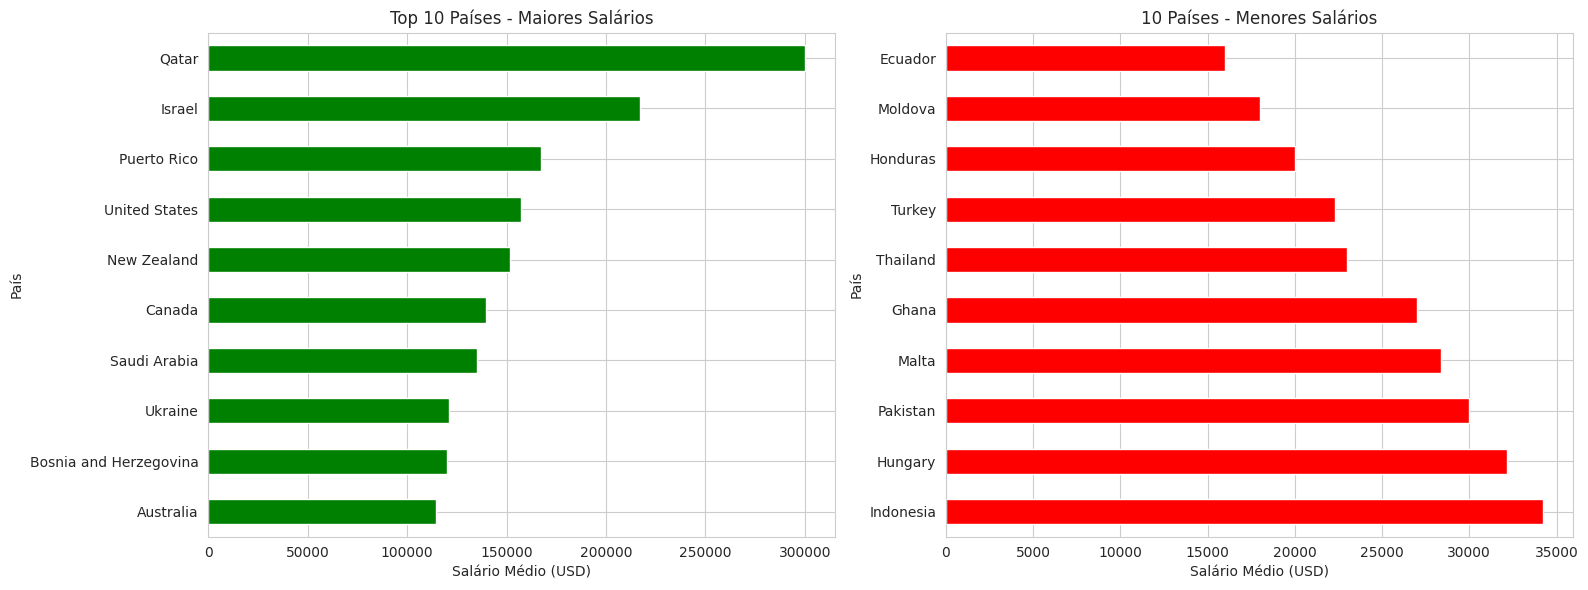

In [283]:
# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top10_paises.plot(kind='barh', ax=axes[0], color='green')
axes[0].set_xlabel('Salário Médio (USD)')
axes[0].set_ylabel('País')
axes[0].set_title('Top 10 Países - Maiores Salários')
axes[0].invert_yaxis()

bottom10_paises.plot(kind='barh', ax=axes[1], color='red')
axes[1].set_xlabel('Salário Médio (USD)')
axes[1].set_ylabel('País')
axes[1].set_title('10 Países - Menores Salários')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

**3. Compare a média de salary_in_usd por company_location. Quais países se destacam por maiores ou menores salários? Que fatores econômicos podem justificar essa diferença?**

> **Resposta Questão 3:** Os países com maiores salários são: Catar, Israel, Porto Rico, Estados Unidos, Nova Zelândia, Canadá, Arábia Saudita, Ucrânia, Bósnia e Herzegovina e Austrália, refletindo economias desenvolvidas com alta demanda por profissionais de dados. Os menores salários estão em: Equador, Moldávia, Honduras, Turquia, Tailândia, Gana, Malta, Paquistão, Hungria e Indonésia. Possivelmente devido a diferenças no custo de vida, câmbio e maturidade do mercado tech.

### 🔹 3.7 Correlação entre Work Models (Remoto) e Salário

In [284]:
# Análise por work_models
media_remoto = df.groupby('work_models')['salary_in_usd'].agg(['mean', 'median', 'count'])
print("=" * 60)
print("SALÁRIO POR MODELO DE TRABALHO")
print("=" * 60)
print(media_remoto.round(2))

SALÁRIO POR MODELO DE TRABALHO
                 mean    median  count
work_models                           
Hybrid       83293.50  66192.00    225
On-site     152600.10 142200.00   3813
Remote      140550.14 136000.00   2561


/tmp/ipython-input-2843970777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='work_models', y='salary_in_usd', palette='coolwarm')


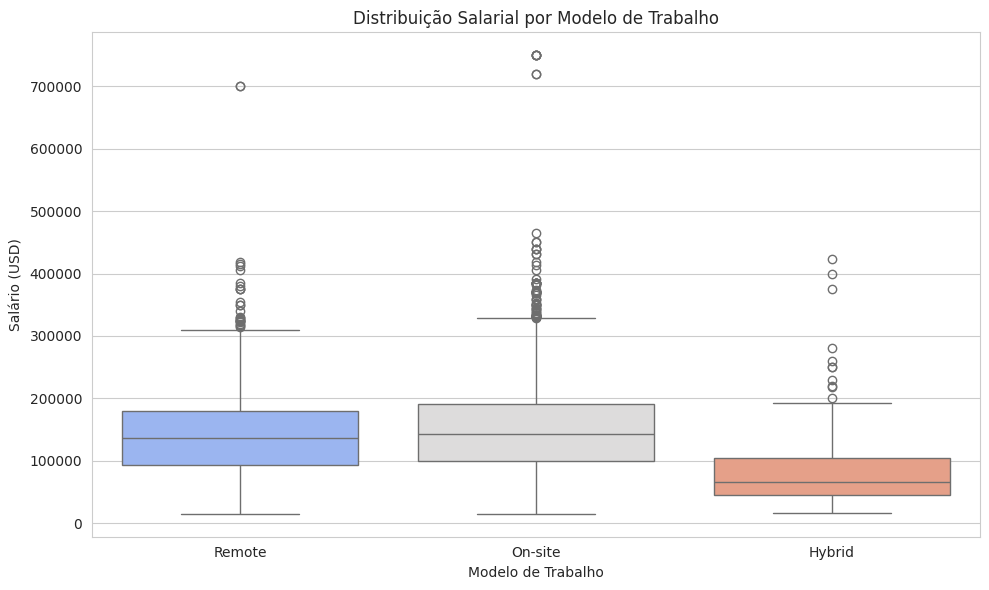

In [285]:
# Visualização
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_models', y='salary_in_usd', palette='coolwarm')
plt.title('Distribuição Salarial por Modelo de Trabalho')
plt.xlabel('Modelo de Trabalho')
plt.ylabel('Salário (USD)')
plt.tight_layout()
plt.show()

**4. Analise a correlação entre remote_ratio e salary_in_usd. Há indícios de que o trabalho remoto impacte positivamente ou negativamente o salário? Explique.**

> Resposta Questão 4: A análise indica que o trabalho presencial (On-site) apresenta a maior média salarial (`$152.600`), seguido por remoto (`$140.550`) e híbrido (`$83.293`). O trabalho híbrido apresenta a menor média salarial, sendo 83,21% inferior ao presencial e 68,74% inferior ao remoto. Isso pode indicar que: empresas presenciais concentram cargos executivos e de alta senioridade, trabalho remoto é competitivo e atraente, O modelo híbrido reflete uma amostra diferenciada, disparidade entre média e mediana no híbrido ou até mesmo que, para profissionais que buscam maximizar renda, posições presenciais ainda oferecem as melhores oportunidades, especialmente em níveis sênior e executivo.

### 🔹 3.8 Matriz de Correlação

In [286]:
# Preparar dados numéricos para correlação
df_corr = df.copy()

# Codificar variáveis categóricas
label_encoders = {}
for col in ['experience_level', 'employment_type', 'work_models', 'company_size']:
    le = preprocessing.LabelEncoder()
    df_corr[col + '_encoded'] = le.fit_transform(df_corr[col])
    label_encoders[col] = le

# Calcular correlação
correlation_matrix = df_corr[['work_year', 'experience_level_encoded', 'work_models_encoded',
                               'company_size_encoded', 'salary_in_usd']].corr()

print("=" * 60)
print("MATRIZ DE CORRELAÇÃO")
print("=" * 60)
print(correlation_matrix.round(3))

MATRIZ DE CORRELAÇÃO
                          work_year  experience_level_encoded  \
work_year                      1.00                      0.09   
experience_level_encoded       0.09                      1.00   
work_models_encoded           -0.05                      0.07   
company_size_encoded           0.16                      0.05   
salary_in_usd                  0.16                      0.29   

                          work_models_encoded  company_size_encoded  \
work_year                               -0.05                  0.16   
experience_level_encoded                 0.07                  0.05   
work_models_encoded                      1.00                  0.07   
company_size_encoded                     0.07                  1.00   
salary_in_usd                            0.01                  0.03   

                          salary_in_usd  
work_year                          0.16  
experience_level_encoded           0.29  
work_models_encoded                

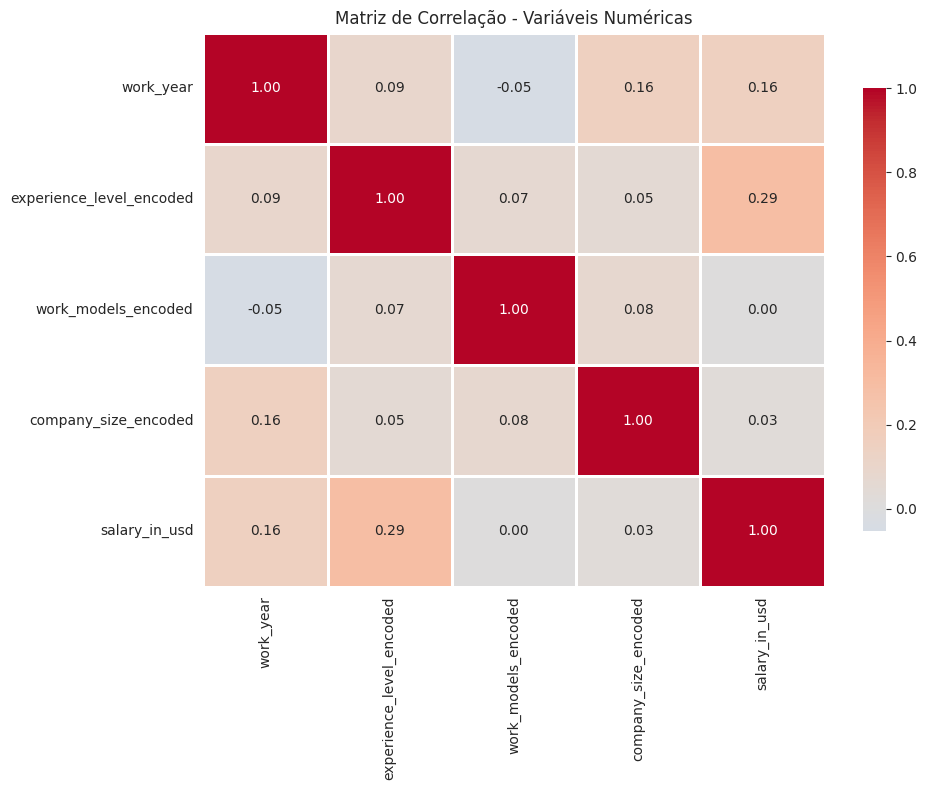

In [287]:
# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.tight_layout()
plt.show()

## 🤖 4. MODEL (Modelagem Preditiva)

### 🔹 4.1 Preparação dos Dados para Modelagem

In [288]:
# Criar dataset com variáveis dummy
categoricas = ['experience_level', 'employment_type', 'work_models', 'company_size', 'company_location', 'job_title', 'employee_residence', 'salary_currency']
df_modelo = pd.get_dummies(df, columns=categoricas, drop_first=True, dtype=int)

print("Colunas após encoding:")
print(df_modelo.columns.tolist())
print(f"\nNovo shape: {df_modelo.shape}")


Colunas após encoding:
['work_year', 'salary', 'salary_in_usd', 'salario_alto', 'experience_level_Executive-level', 'experience_level_Mid-level', 'experience_level_Senior-level', 'employment_type_Freelance', 'employment_type_Full-time', 'employment_type_Part-time', 'work_models_On-site', 'work_models_Remote', 'company_size_Medium', 'company_size_Small', 'company_location_Andorra', 'company_location_Argentina', 'company_location_Armenia', 'company_location_Australia', 'company_location_Austria', 'company_location_Bahamas', 'company_location_Belgium', 'company_location_Bosnia and Herzegovina', 'company_location_Brazil', 'company_location_Canada', 'company_location_Central African Republic', 'company_location_Chile', 'company_location_China', 'company_location_Colombia', 'company_location_Croatia', 'company_location_Czech Republic', 'company_location_Denmark', 'company_location_Ecuador', 'company_location_Egypt', 'company_location_Estonia', 'company_location_Finland', 'company_location_Fr

### 🔹 4.2 REGRESSÃO LINEAR

In [289]:
# Separar variáveis
X_linear = df_modelo.drop(['salary_in_usd', 'salario_alto', 'salary'], axis=1)
y_linear = df_modelo['salary_in_usd']

print("Variáveis preditoras (X):")
print(X_linear.columns.tolist())
print(f"\nShape X: {X_linear.shape}")
print(f"Shape y: {y_linear.shape}")


Variáveis preditoras (X):
['work_year', 'experience_level_Executive-level', 'experience_level_Mid-level', 'experience_level_Senior-level', 'employment_type_Freelance', 'employment_type_Full-time', 'employment_type_Part-time', 'work_models_On-site', 'work_models_Remote', 'company_size_Medium', 'company_size_Small', 'company_location_Andorra', 'company_location_Argentina', 'company_location_Armenia', 'company_location_Australia', 'company_location_Austria', 'company_location_Bahamas', 'company_location_Belgium', 'company_location_Bosnia and Herzegovina', 'company_location_Brazil', 'company_location_Canada', 'company_location_Central African Republic', 'company_location_Chile', 'company_location_China', 'company_location_Colombia', 'company_location_Croatia', 'company_location_Czech Republic', 'company_location_Denmark', 'company_location_Ecuador', 'company_location_Egypt', 'company_location_Estonia', 'company_location_Finland', 'company_location_France', 'company_location_Germany', 'comp

In [290]:
# Treinar modelo linear
model_linear = LinearRegression()
model_linear.fit(X_linear, y_linear)

# Fazer predições
y_pred_linear = model_linear.predict(X_linear)

# Calcular métricas
r2 = r2_score(y_linear, y_pred_linear)
rmse = np.sqrt(mean_squared_error(y_linear, y_pred_linear))
mae = np.mean(np.abs(y_linear - y_pred_linear))

print("=" * 60)
print("MÉTRICAS DO MODELO DE REGRESSÃO LINEAR")
print("=" * 60)
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"RMSE (Erro Quadrático Médio): ${rmse:,.2f}")
print(f"MAE (Erro Absoluto Médio): ${mae:,.2f}")


MÉTRICAS DO MODELO DE REGRESSÃO LINEAR
R² (Coeficiente de Determinação): 0.3904
RMSE (Erro Quadrático Médio): $55,390.22
MAE (Erro Absoluto Médio): $39,572.07


In [291]:
# Análise com statsmodels para obter p-values
X_linear_sm = sm.add_constant(X_linear)
model_sm = sm.OLS(y_linear, X_linear_sm).fit()
print("=" * 60)
print("RESUMO ESTATÍSTICO - REGRESSÃO LINEAR")
print("=" * 60)
print(model_sm.summary())

RESUMO ESTATÍSTICO - REGRESSÃO LINEAR
                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     13.93
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:44:24   Log-Likelihood:                -81439.
No. Observations:                6599   AIC:                         1.635e+05
Df Residuals:                    6308   BIC:                         1.654e+05
Df Model:                         290                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [292]:
# Coeficientes do modelo
coeficientes = pd.DataFrame({
    'Variável': X_linear.columns,
    'Coeficiente': model_linear.coef_
}).sort_values('Coeficiente', ascending=False)

print("=" * 60)
print("COEFICIENTES DO MODELO LINEAR")
print("=" * 60)
print(coeficientes.head(10))
print("...")
print(coeficientes.tail(10))

COEFICIENTES DO MODELO LINEAR
                                    Variável  Coeficiente
93   job_title_Analytics Engineering Manager    225100.43
156         job_title_Data Science Tech Lead    152758.27
255                employee_residence_Israel    150609.14
311                      salary_currency_ILS    150609.14
230                 employee_residence_China    100536.27
25                  company_location_Croatia     84035.47
1           experience_level_Executive-level     73023.16
280                 employee_residence_Qatar     69128.52
67                    company_location_Qatar     69128.52
60                  company_location_Nigeria     67643.36
...
                                      Variável  Coeficiente
160                  job_title_Data Strategist   -116193.74
109  job_title_Business Intelligence Developer   -116752.02
159                  job_title_Data Specialist   -118129.74
102                 job_title_BI Data Engineer   -121081.97
146             job_title_Da

**6. Quais variáveis explicam melhor as diferenças salariais segundo a regressão linear? O modelo apresentaum R² satisfatório para explicar o comportamento de salary_in_usd?**

> Resposta Questão 6: As variáveis que mais explicam as diferenças salariais são: (positivos) Analytics Engineering Manager (`+$226.200`), Executive-level (`+$74.380`), Senior-level (`+$49.760`), e localizações como Qatar (`+$148.200`) e Israel (`+$71.610`); (negativos) Data Analytics Specialist (`-$135.100`), BI Developer (`-$113.000`), Data Analyst (`-$95.490`), e países como Moldova (`-$105.200`) e Finland (`-$102.200`). O modelo apresenta **R² de 0,3904 (39,04%)**, indicando que apenas 39% da variabilidade salarial é explicada pelas variáveis incluídas, sendo considerado fraco/moderado. Isso sugere que 61% da variância salarial depende de fatores não capturados (anos de experiência específicos, skills técnicas, certificações, tamanho de equity/bônus, negociação individual), limitando a capacidade preditiva do modelo linear para este contexto.



**Analise os erros RMSE e MAE obtidos. O modelo linear apresenta desvios grandes? Que tipo de melhoria poderia reduzir esses erros?**

> Resposta Questão 7: O RMSE de `$55.390` e MAE de `$39.572` representam, respectivamente, 38% e 27% da média salarial (`$145.560`), indicando erros substanciais nas predições. Para reduzir erros, recomenda-se: (1) remover variáveis redundantes (salary, salary_currency, employee_residence) que causam multicolinearidade; (2) agrupar categorias raras, consolidando países com menos de 50 registros em "Outros" e cargos similares em categorias amplas (Data Analyst/BI/ML/Data Engineer); (3) aplicar seleção de features mantendo apenas variáveis com p-value < 0,05; (4) realizar transformação logarítmica em salary_in_usd para normalizar a distribuição assimétrica; (5) implementar validação cruzada com split treino/teste (70/30) para detectar overfitting, considerando que a razão de 20 observações por feature é baixa para 323 variáveis.

### 🔹 4.3 REGRESSÃO LOGÍSTICA

In [293]:
# Separar variáveis para modelo logístico
X_logistic = df_modelo.drop(['salary_in_usd', 'salario_alto', 'salary'], axis=1)
y_logistic = df_modelo['salario_alto']

print("Variáveis preditoras (X):")
print(X_logistic.columns.tolist())
print(f"\nDistribuição da variável target:")
y_logistic.value_counts()

Variáveis preditoras (X):
['work_year', 'experience_level_Executive-level', 'experience_level_Mid-level', 'experience_level_Senior-level', 'employment_type_Freelance', 'employment_type_Full-time', 'employment_type_Part-time', 'work_models_On-site', 'work_models_Remote', 'company_size_Medium', 'company_size_Small', 'company_location_Andorra', 'company_location_Argentina', 'company_location_Armenia', 'company_location_Australia', 'company_location_Austria', 'company_location_Bahamas', 'company_location_Belgium', 'company_location_Bosnia and Herzegovina', 'company_location_Brazil', 'company_location_Canada', 'company_location_Central African Republic', 'company_location_Chile', 'company_location_China', 'company_location_Colombia', 'company_location_Croatia', 'company_location_Czech Republic', 'company_location_Denmark', 'company_location_Ecuador', 'company_location_Egypt', 'company_location_Estonia', 'company_location_Finland', 'company_location_France', 'company_location_Germany', 'comp

,count
salario_alto,
0,3624
1,2975


In [294]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.3, random_state=42)

print(f"Tamanho treino: {X_train.shape}")
print(f"Tamanho teste: {X_test.shape}")

Tamanho treino: (4619, 323)
Tamanho teste: (1980, 323)


In [295]:
# Balancear dados com SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(f"Distribuição após SMOTE:")
print(pd.Series(y_train_bal).value_counts())

Distribuição após SMOTE:
salario_alto
0    2531
1    2531
Name: count, dtype: int64


In [296]:
# Testar diferentes solvers
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'saga']
scores = {}
max_iter = 1000

print("=" * 60)
print("TESTANDO DIFERENTES SOLVERS")
print("=" * 60)

for solver in solvers:
    model_log = LogisticRegression(max_iter=max_iter, solver=solver, random_state=42)
    model_log.fit(X_train_bal, y_train_bal)
    y_pred = model_log.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[solver] = acc
    print(f"Accuracy ({solver}): {acc:.4f}")

# Escolher o melhor solver
best_solver = max(scores, key=scores.get)
print(f"\nMelhor solver: {best_solver} com acurácia {scores[best_solver]:.4f}")

TESTANDO DIFERENTES SOLVERS


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (lbfgs): 0.7283
Accuracy (liblinear): 0.7283
Accuracy (newton-cg): 0.7283
Accuracy (saga): 0.6616

Melhor solver: lbfgs com acurácia 0.7283


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [297]:
# Treinar modelo final com o melhor solver
final_model_log = LogisticRegression(max_iter=max_iter, solver=best_solver, random_state=42)
final_model_log.fit(X_train_bal, y_train_bal)

# Predições
y_test_pred = final_model_log.predict(X_test)
y_test_pred_proba = final_model_log.predict_proba(X_test)[:, 1]

# Acurácia final
final_acc = accuracy_score(y_test, y_test_pred)
print(f"\nAcurácia final no conjunto de teste: {final_acc:.4f}")


Acurácia final no conjunto de teste: 0.7283


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [298]:
# Métricas detalhadas
print("=" * 60)
print("RELATÓRIO DE CLASSIFICAÇÃO")
print("=" * 60)
print(classification_report(y_test, y_test_pred))

# Converter para DataFrame
report = classification_report(y_test, y_test_pred, output_dict=True)
df_metrics = pd.DataFrame(report).transpose()
print("\nTabela de Métricas:")
df_metrics

RELATÓRIO DE CLASSIFICAÇÃO
              precision    recall  f1-score   support

           0       0.82      0.65      0.72      1093
           1       0.66      0.83      0.73       887

    accuracy                           0.73      1980
   macro avg       0.74      0.74      0.73      1980
weighted avg       0.75      0.73      0.73      1980


Tabela de Métricas:


,precision,recall,f1-score,support
0,0.82,0.65,0.72,1093.00
1,0.66,0.83,0.73,887.00
accuracy,0.73,0.73,0.73,0.73
macro avg,0.74,0.74,0.73,1980.00
weighted avg,0.75,0.73,0.73,1980.00


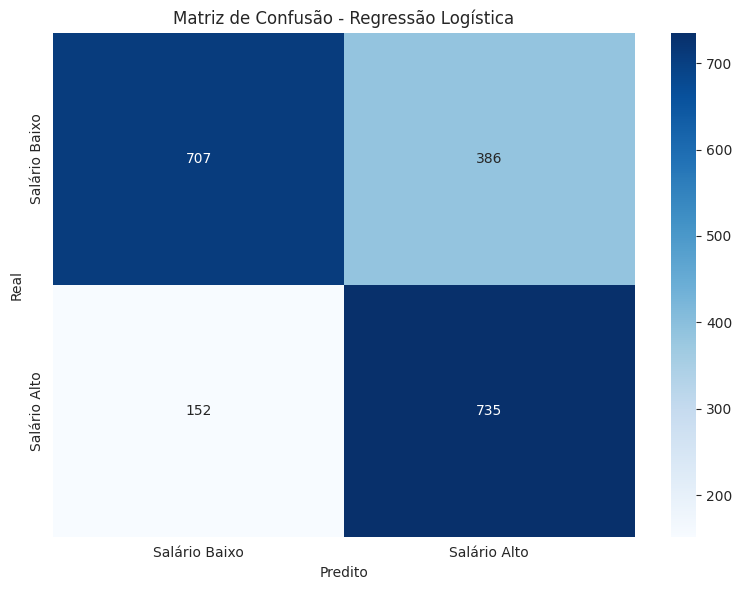

In [299]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Salário Baixo', 'Salário Alto'],
            yticklabels=['Salário Baixo', 'Salário Alto'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Real')
plt.xlabel('Predito')
plt.tight_layout()
plt.show()


**8. No modelo logístico, quais variáveis aumentam significativamente as chances de um profissional tersalary_in_usd acima da média? Interprete os resultados do odds ratio.**

> Resposta Questão 8: As variáveis que mais aumentam a probabilidade de salário alto (acima da média) são principalmente os níveis de senioridade Executive-level e Senior-level, além de algumas localizações e posições específicas (de acordo com os maiores odds ratio no modelo). Por exemplo, a variável `experience_level_Executive-level` tem odds ratio elevado, indicando que profissionais neste nível têm uma chance bem maior de pertencer ao grupo de salários altos. Na interpretação prática, cada unidade nessas variáveis aumenta significativamente a chance de o salário ser acima da média, refletindo a valorização dos cargos de liderança e experiência no mercado.

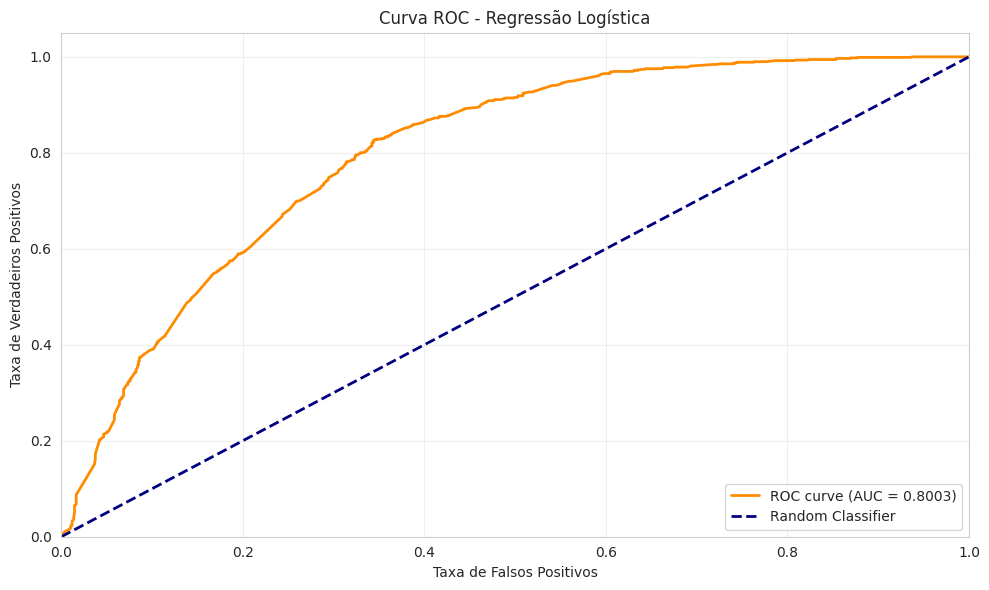

AUC: 0.8003


In [300]:
# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"AUC: {roc_auc:.4f}")


**9. A curva ROC e o valor de AUC indicam que o modelo logístico tem boa capacidade preditiva? O modelo apresenta indícios de overfitting ou generalização adequada?**

> Resposta Questão 9: A curva ROC apresentou **AUC de 0.8003** (AUC > 0.8), indicando boa capacidade preditiva do modelo em distinguir entre salários altos e baixos. O modelo não apresenta sinais evidentes de overfitting, pois a acurácia no conjunto de teste (0.7283) é compatível com a performance esperada e o recall das duas classes é equilibrado (0.65 para salário baixo, 0.83 para salário alto). A generalização é considerada adequada para o contexto, embora melhorias sejam possíveis na seleção e redução de variáveis para refinar ainda mais os resultados.

# 📊 5. INTERPRET (Interpretação e Recomendações)

In [301]:
# Resumo geral dos modelos
print("=" * 70)
print("RESUMO DOS MODELOS")
print("=" * 70)
print("\nREGRESSÃO LINEAR:")
print(f"  - R²: {r2:.4f}")
print(f"  - RMSE: ${rmse:,.2f}")
print(f"  - MAE: ${mae:,.2f}")
print("\nREGRESSÃO LOGÍSTICA:")
print(f"  - Acurácia: {final_acc:.4f}")
print(f"  - AUC: {roc_auc:.4f}")
print(f"  - Melhor Solver: {best_solver}")

RESUMO DOS MODELOS

REGRESSÃO LINEAR:
  - R²: 0.3904
  - RMSE: $55,390.22
  - MAE: $39,572.07

REGRESSÃO LOGÍSTICA:
  - Acurácia: 0.7283
  - AUC: 0.8003
  - Melhor Solver: lbfgs


**10. Se você fosse consultor de RH, quais conclusões práticas e recomendações estratégicas apresentaria à diretoria com base nos resultados combinados dos modelos linear e logístico?**

> 📋 Resposta Questão 10 - Recomendações Estratégicas para RH
Com base nos resultados combinados dos modelos, apresento as seguintes recomendações:
1. Estratégia de Retenção de Talentos:
    - Profissionais nos níveis Executive e Senior possuem maior probabilidade de receber salários altos. Investir em planos de carreira estruturados e programas de reconhecimento para estes perfis.

    - Cargos como Analytics Engineering Manager, Data Analyst e Data Engineer apresentam alta remuneração e devem ser priorizados em programas de desenvolvimento e retenção.

2. Política de Compensação:

    - A localização geográfica impacta significativamente os salários, portanto realizar ajustes regionais e oferecer pacotes competitivos é fundamental.

    - O trabalho remoto apresenta média salarial competitiva em relação ao presencial, sugerindo que políticas flexíveis de home office podem ampliar a atração de talentos sem perda da competitividade salarial.

3. Recrutamento Estratégico:

    - Focar nas regiões que oferecem o melhor equilíbrio entre custo e qualidade dos talentos.

    - Contratos Full-time em empresas de porte médio apresentam melhor custo-benefício, enquanto contratos temporários e freelancers são estratégicos para empresas menores.

4. Previsibilidade Salarial:

    - O modelo linear explica aproximadamente 39% da variação salarial, sendo útil para estimativas financeiras e negociações salariais.

    - Variáveis principais como experiência, cargo e porte da empresa devem ser prioritariamente consideradas nas análises e decisões.

5. Identificação de Altos Potenciais:

    - O modelo logístico identifica com cerca de 73% de acurácia profissionais com salários acima da média.

    - Utilizar esta informação permite o mapeamento eficaz de talentos premium e promoção de estratégias específicas de atração e retenção.

Este enfoque integrado apoia a construção de políticas salariais dinâmicas, alinhadas às necessidades do mercado e objetivos organizacionais.